<a href="https://colab.research.google.com/github/ArturGuilherme/data-science-kaggle/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introdução


**Desafio do Kaggle**:  Titanic - Machine Learning from Disaster

**Objetivo:** Utilizar os dados do passageiro do Titanic (nome, idade, preço da passagem, etc) para tentar prever quem vai sobreviver e quem vai morrer.

**Datasets**: 

*   Train.csv - Dataset para treinamento o algoritmo de classificação
*   Test.csv - Dataset para teste do algoritmo de classificação

**Algoritmo de classificação**: Random forest






## Importação das bibliotecas e datasets 

In [248]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.ensemble import RandomForestClassifier

In [249]:
#Fazendo a leitura dos datasets de treinamento e também de teste
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [250]:
# teste de importação para a base train
df_train.head() # Sem passagem de parametro, por padrão serão visualizadas 5 amostras

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
# teste de importação para a base train
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Note que o dataset de teste não tem a coluna "Survived", pois nós que iremos predizer. 

## Análise Exploratória


In [252]:
# Describe() é primera etapa da análise. A função nos trás algumas informações estatísticas básicas do nosso dataset para as colunas númericas
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos desconsiderar a coluna PassengerId nos dois datset, pois é uma  coluna ID. 


In [253]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [254]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


O dataset train.csv tem 891 amostras, 12 variaveis, sendo uma variável de predição e uma para ID.
2 variaveis são flutuantes, 5 são inteiros e 5 são objetos. 
Podemos obervar que existe uma quantidade considerável de dados missing para as colunas Age e Cabin.

### **1 - Sexo e Sobrevivência**

Qtde pessoas que sobreviveram: 342
Qtde pessoas que morreram: 549


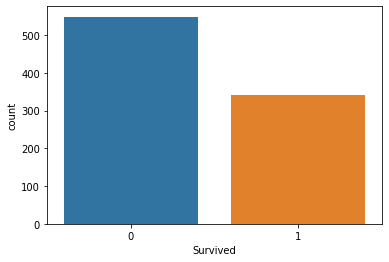

In [255]:
# Quantidade de pessoas que sobreviveram e morreram. 
# 0 - Morreu 
# 1 - Sobreviveu
qtd_suvived = df_train[df_train.Survived == 1].Survived.count()
qtd_died = df_train[df_train.Survived == 0].Survived.count()
print('Qtde pessoas que sobreviveram: '+str(qtd_suvived))
print('Qtde pessoas que morreram: '+str(qtd_died))
sns.countplot(x='Survived', data=df_train);

Qtde de Homens que sobreviram: 109
Qtde de Mulheres que sobreviram: 233


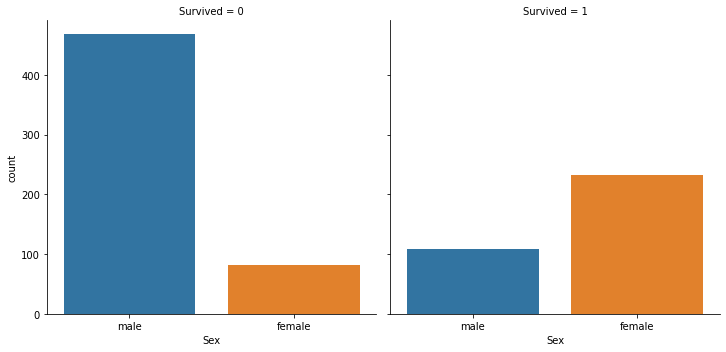

In [256]:
df_survided = df_train[df_train['Survived'] == 1]
qtd_female_survided = df_survided[df_survided['Sex'] == 'female'].Sex.count()
qtdn_male_survided = df_survided[df_survided['Sex'] == 'male'].Sex.count()

print('Qtde de Homens que sobreviram: '+str(qtdn_male_survided))
print('Qtde de Mulheres que sobreviram: '+str(qtd_female_survided))

sns.catplot(x='Sex', col='Survived', kind='count', data=df_train);

A primeira análise a ser considerada é, sobreviram mais **mulheres do que homens**. Dos 38% das pessoas que sobreviveram, **68.12%** são mulheres e **31.88%** são homens.

### **2 - Classe e Sobrevivência**

In [257]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


A terceira classe teve a maior quantidade de passageiros e também onde  morreram mais passageiros.

In [258]:
print("% de Sobrevivência") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% de Sobrevivência
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


### **3 - Idade/Sexo e Sobrevivência**

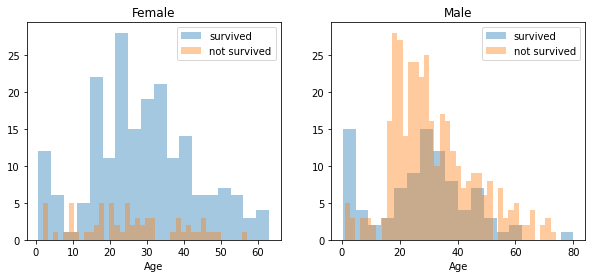

In [259]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
mulher = df_train[df_train['Sex']=='female']
homem = df_train[df_train['Sex']=='male']

ax = sns.distplot(mulher[mulher['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(mulher[mulher['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(homem[homem['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(homem[homem['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

No contexto masculino a faixa etaria onde tiveram mais sobreviventes foi entre **18 a 38 anos**, já no femino, entre **14 a 28** anos. Idades entre **0,4 a 5** anos tiveram altos volumes para os dois contextos.  

### **4 - Ponto de Embarque, Classe and Sexo**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


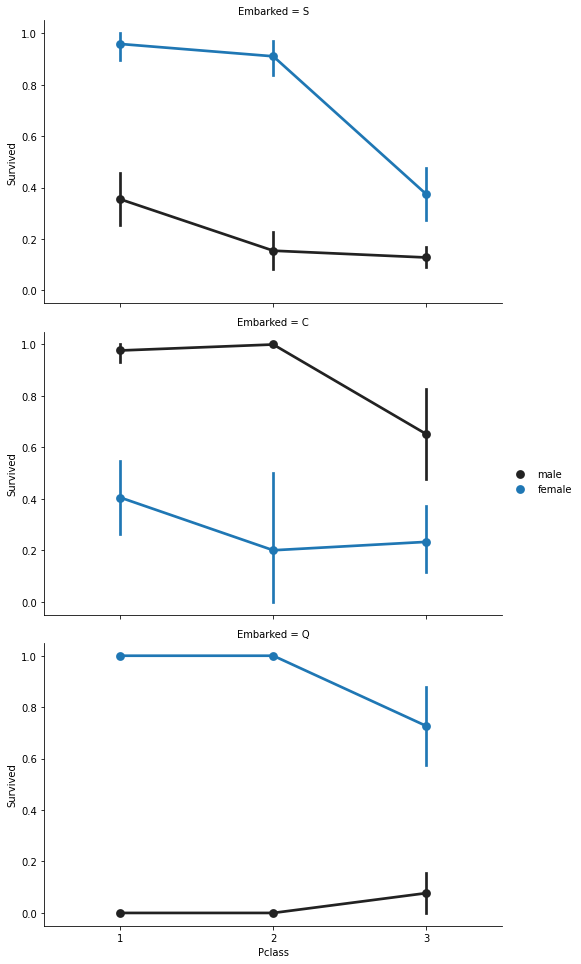

In [260]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Conforme demonstrado no gráfico de pontos, o ponto de embarque está fortemente associado a sobrevivência do passageiro. Podemos perceber que no ponto Q e S, as chances de uma mulher sobreviver é alta, ainda mais se for da primeira ou segunda classe, a mesma lógica acontece inversamente. 

### **5 - SibSp and Parch**

In [261]:
pd.crosstab(df_train.SibSp, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [262]:
pd.crosstab(df_train.Parch, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [263]:
data = [df_train,df_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [264]:
pd.crosstab(df_train.relatives, df_train.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
relatives,,,
0,374,163,537
1,72,89,161
2,43,59,102
3,8,21,29
4,12,3,15
5,19,3,22
6,8,4,12
7,6,0,6
10,7,0,7


Aparentemente a quantidade de filhos ou parentes que estavam embarcados junto com passageiro não tem muita relevância para sobrevivência

# Tratamento dos dados

In [265]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [266]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [df_train, df_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [267]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train["Age"].astype(int)
    
df_train["Age"].isnull().sum()

0

In [268]:
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [269]:
common_value = 'S'
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [270]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [271]:
data = [df_train, df_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [272]:
data = [df_train, df_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
df_train = df_train.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [273]:
genders = {"male": 0, "female": 1}
data = [df_train, df_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [274]:
df_train['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [275]:
df_train = df_train.drop(['Ticket'], axis=1)
df_test = df_test.drop(['Ticket'], axis=1)

In [276]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [df_train, df_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [277]:
data = [df_train, df_test]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7

# let's see how it's distributed 
df_train['Age'].value_counts()

4    176
6    153
5    146
3    132
2    116
1     93
0     68
7      7
Name: Age, dtype: int64

In [278]:
data = [df_train, df_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [279]:
data = [df_train, df_test]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [280]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
df_train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,5,0,0,1,2,0,1,8,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Modelo ML

In [281]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()

In [282]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [283]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

92.93

In [284]:
df_survided = pd.DataFrame(Y_prediction,columns=['Survived'])
df_passengerId = pd.DataFrame(df_test.PassengerId,columns=['PassengerId'])

In [285]:
df_submit = pd.concat([df_passengerId, df_survided],axis=1)

In [286]:
df_submit.to_csv('titanic_predict.csv',index=False)